# Real-world Data Wrangling

This project investigates global air pollution trends with a focus on identifying the most affected countries, assessing the impact of the COVID-19 pandemic on pollution levels, and evaluating how air quality has evolved over time. By analyzing PM2.5 concentration data from multiple years and regions, the study addresses three primary questions:

Which countries were the most polluted during the observed period?

Was there a significant drop in air pollution in 2020, potentially due to COVID-19 lockdowns?

Which countries experienced the greatest improvement or deterioration in air quality between 2018 and 2021?

 PM2.5 is a major component of air pollution and smog — often produced by vehicle emissions, industrial activity, wildfires, and fossil fuel burning.
 It’s one of the key indicators used by the World Health Organization and environmental agencies to assess air quality.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [169]:
%pip install pymongo
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pymongo
from pymongo import MongoClient
import json

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### **Dataset 1**

Type: CSV File.

Method: The data was gathered using the "Downloading files" method from Kaggle.

Dataset variables:

Rank         
City         
2021         
JAN(2021)    
FEB(2021)    
MAR(2021)    
APR(2021)    
MAY(2021)    
JUN(2021)    
JUL(2021)    
AUG(2021)    
SEP(2021)    
OCT(2021)    
NOV(2021)    
DEC(2021)    
2020         
2019         
2018         
2017         

In [170]:
#Loading data locally
data=pd.read_csv(r"C:\Users\asus\Downloads\AIR QUALITY INDEX (by cities) - IQAir.csv")
data.replace('-', np.nan, inplace=True)
data


,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163,106.6,110.2,135.2,144.6
2,3,"Hotan, China",101.5,NaN,NaN,158,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116,91.9
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,"Jaunpur, India",95.3,182.2,143.5,91,70,51.1,40.7,33.5,34.2,36.8,75.7,196,195.7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6470,6471,"Mornington, Australia",2.4,2,1.9,2.3,2.1,3.2,3.6,4.3,2.1,2.1,1.7,2,1.9,3.2,3.8,3,3.9
6471,6472,"Emu River, Australia",2.1,1.9,1.8,2,2.6,3.4,2.6,1.9,2.1,2.2,1.5,1.4,1.5,2.6,2.5,2.6,2.3
6472,6473,"Judbury, Australia",2.0,1.6,1.5,2.1,1.5,4.1,2,2.2,2.2,1.7,1.5,1.4,1.7,2.4,5.7,2.2,1.9
6473,6474,"St Helens, Australia",1.9,1.8,2.1,2,2.4,2.7,1.6,1.6,1.6,1.9,1.6,2.4,1.6,2.4,2.4,2.9,3.3


#### Dataset 2

Type: CSV File.

Method:  The data was gathered using the API method from Kaggle.

Dataset variables:

Rank              
Country/Region    
2021              
2020              
2019              
2018              
Population  

In [171]:
#Loading dataset 2 using api
os.makedirs(os.path.expanduser("~/.cache/kagglehub"), exist_ok=True)

file_path = "AIR QUALITY INDEX- top countries.csv"

dataa = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    
    "ramjasmaurya/most-polluted-cities-and-countries-iqair-index",
    file_path
)

print("First 5 records:")
print(dataa.head())
dataa.replace('-', np.nan, inplace=True)

desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "polluted_cities.csv")
dataa.to_csv(desktop_path, index=False)
print(f"\nDataset saved to: {desktop_path}")


C:\Users\asus\AppData\Local\Temp\ipykernel_5256\865147818.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  dataa = kagglehub.load_dataset(


First 5 records:
   Rank Country/Region  2021  2020  2019  2018     Population
0     1     Bangladesh  76.9  77.1  83.3  97.1    164,689,383
1     2           Chad  75.9     -     -     -     16,425,859
2     3       Pakistan  66.8    59  65.8  74.3    220,892,331
3     4     Tajikistan  59.4  30.9     -     -      9,537,642
4     5          India  58.1  51.9  58.1  72.5  1,380,004,385

Dataset saved to: C:\Users\asus\Desktop\polluted_cities.csv


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

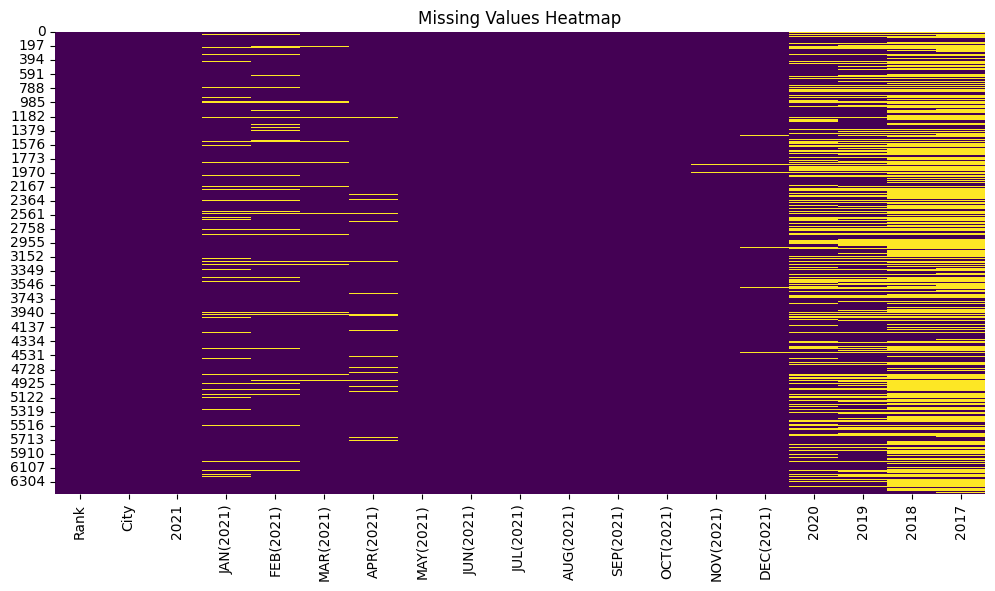

In [172]:

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [173]:
print(data.isnull().sum())
print("--------------------------")
print(dataa.isnull().sum())

Rank            0
City            0
2021            0
JAN(2021)     671
FEB(2021)     574
MAR(2021)     193
APR(2021)     256
MAY(2021)      16
JUN(2021)      16
JUL(2021)      22
AUG(2021)       9
SEP(2021)      17
OCT(2021)      26
NOV(2021)      43
DEC(2021)      87
2020         2207
2019         2422
2018         3999
2017         4194
dtype: int64
--------------------------
Rank               0
Country/Region     0
2021               0
2020              17
2019              27
2018              46
Population         0
dtype: int64


there are some Missing vaules 

### Quality Issue 2:

In [174]:
print(data.duplicated().sum())
print(dataa.duplicated().sum())

0
0


no duplicates found

In [175]:
print(data.dtypes)
print("--------------------------")
print(dataa.dtypes)

Rank           int64
City          object
2021         float64
JAN(2021)     object
FEB(2021)     object
MAR(2021)     object
APR(2021)     object
MAY(2021)     object
JUN(2021)     object
JUL(2021)     object
AUG(2021)     object
SEP(2021)     object
OCT(2021)     object
NOV(2021)     object
DEC(2021)     object
2020          object
2019          object
2018          object
2017          object
dtype: object
--------------------------
Rank                int64
Country/Region     object
2021              float64
2020               object
2019               object
2018               object
Population         object
dtype: object


Wrong data types are used here we need to convert obj->float

### Tidiness Issue 1:

Dash '-' used instead of Missing Value been identified earlier and solved beacuase it was needed to identify missing values

the justification is that we cant really deal with missing values or deal with any of the empty values while filled with '-'


other issues will be dealt with now 

In [176]:
#FILL IN - Inspecting the dataframe visually
data.head()


,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163,106.6,110.2,135.2,144.6
2,3,"Hotan, China",101.5,NaN,NaN,158,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116,91.9
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,"Jaunpur, India",95.3,182.2,143.5,91,70,51.1,40.7,33.5,34.2,36.8,75.7,196,195.7,NaN,NaN,NaN,NaN


In [177]:
dataa

,Rank,Country/Region,2021,2020,2019,2018,Population
0,1,Bangladesh,76.9,77.1,83.3,97.1,"164,689,383"
1,2,Chad,75.9,NaN,NaN,NaN,"16,425,859"
2,3,Pakistan,66.8,59,65.8,74.3,"220,892,331"
3,4,Tajikistan,59.4,30.9,NaN,NaN,"9,537,642"
4,5,India,58.1,51.9,58.1,72.5,"1,380,004,385"
...,...,...,...,...,...,...,...
113,114,"Bonaire, Saint Eustatius and Saba",5.1,NaN,NaN,NaN,"26,221"
114,115,Cape Verde,5.1,NaN,NaN,NaN,"555,988"
115,116,Puerto Rico,4.8,3.7,10.2,13.7,"2,860,840"
116,117,U.S. Virgin Islands,4.5,3.7,3.5,NaN,"104,423"


months and years shouldnt be columns but should be rows insead

### Tidiness Issue 2: 

In [178]:
data.head()


,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163,106.6,110.2,135.2,144.6
2,3,"Hotan, China",101.5,NaN,NaN,158,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116,91.9
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,"Jaunpur, India",95.3,182.2,143.5,91,70,51.1,40.7,33.5,34.2,36.8,75.7,196,195.7,NaN,NaN,NaN,NaN


In [179]:
# Check if any column is constant (non-informative)
constant_cols = [col for col in data.columns if data[col].nunique(dropna=False) <= 1]

# Check unique counts for all columns
unique_counts = data.nunique(dropna=False)

# Check data types for structural clues
dtypes = data.dtypes

constant_cols, unique_counts, dtypes


([],
 Rank         6475
 City         6216
 2021          522
 JAN(2021)     770
 FEB(2021)     704
 MAR(2021)     685
 APR(2021)     524
 MAY(2021)     454
 JUN(2021)     420
 JUL(2021)     429
 AUG(2021)     577
 SEP(2021)     423
 OCT(2021)     514
 NOV(2021)     658
 DEC(2021)     715
 2020          509
 2019          512
 2018          491
 2017          499
 dtype: int64,
 Rank           int64
 City          object
 2021         float64
 JAN(2021)     object
 FEB(2021)     object
 MAR(2021)     object
 APR(2021)     object
 MAY(2021)     object
 JUN(2021)     object
 JUL(2021)     object
 AUG(2021)     object
 SEP(2021)     object
 OCT(2021)     object
 NOV(2021)     object
 DEC(2021)     object
 2020          object
 2019          object
 2018          object
 2017          object
 dtype: object)

Rank is not useful in this analysis becuase we're focusing on AQI vaules themselves

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [180]:
data1=data.copy()
data2=dataa.copy()

### **Quality Issue 1: FILL IN**

### Missing values is the first quality issue and i chose to deal with it later on the project

In [181]:
# FILL IN - Apply the cleaning strategy

In [182]:
# FILL IN - Validate the cleaning was successful

Justification: *FILL IN*

### **Quality Issue 2: FILL IN**

In [183]:
month_cols1 = [
    "JAN(2021)", "FEB(2021)", "MAR(2021)", "APR(2021)", "MAY(2021)", "JUN(2021)",
    "JUL(2021)", "AUG(2021)", "SEP(2021)", "OCT(2021)", "NOV(2021)", "DEC(2021)","2020","2019","2018","2017"
]

data1[month_cols1] = data1[month_cols1].apply(pd.to_numeric, errors='coerce')



month_cols2 = [
    "2021","2020","2019","2018","Population"
]
data2[month_cols2] = data2[month_cols2].apply(pd.to_numeric, errors='coerce')




In [184]:
print(data1.dtypes)
print("--------------------------")
print(data2.dtypes)

Rank           int64
City          object
2021         float64
JAN(2021)    float64
FEB(2021)    float64
MAR(2021)    float64
APR(2021)    float64
MAY(2021)    float64
JUN(2021)    float64
JUL(2021)    float64
AUG(2021)    float64
SEP(2021)    float64
OCT(2021)    float64
NOV(2021)    float64
DEC(2021)    float64
2020         float64
2019         float64
2018         float64
2017         float64
dtype: object
--------------------------
Rank                int64
Country/Region     object
2021              float64
2020              float64
2019              float64
2018              float64
Population        float64
dtype: object


Using float with these columns will help us aggregate through the data

### **Tidiness Issue 1: FILL IN**

In [185]:

# Step 1: Identify columns that contain month-year values
month_year_cols = [col for col in data1.columns if '(' in col and ')' in col]

# Step 2: Melt the DataFrame to long format
df_melted = pd.melt(
    data1,
    id_vars=['Rank', 'City'],
    value_vars=month_year_cols,
    var_name='Month_Year',
    value_name='AQI'
)

# Step 3: Extract Month and Year into separate columns
df_melted[['Month', 'Year']] = df_melted['Month_Year'].str.extract(r'([A-Z]+)\((\d{4})\)')

# Step 4: Reorder columns for clarity
df_cleaned = df_melted[['Rank', 'City', 'Year', 'Month', 'AQI']]

# Step 5: Replace "-" with NaN and convert AQI to float
df_cleaned['AQI'] = pd.to_numeric(df_cleaned['AQI'], errors='coerce')




C:\Users\asus\AppData\Local\Temp\ipykernel_5256\796558122.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AQI'] = pd.to_numeric(df_cleaned['AQI'], errors='coerce')


In [186]:
year_cols = [col for col in data2.columns if col.isdigit()]

# Melt the DataFrame to long format
df2_melted = pd.melt(
    data2,
    id_vars=['Rank', 'Country/Region', 'Population'],
    value_vars=year_cols,
    var_name='Year',
    value_name='AQI'
)

# Reorder columns for clarity
df_cleaned2 = df2_melted[['Rank', 'Country/Region', 'Year', 'Population', 'AQI']]

# Convert AQI and Population to appropriate types
df_cleaned2['AQI'] = pd.to_numeric(df_cleaned2['AQI'], errors='coerce')
df_cleaned2['Population'] = pd.to_numeric(df_cleaned2['Population'], errors='coerce')




In [187]:
# The cleaned DataFrame is now tidy
df_cleaned.head()

,Rank,City,Year,Month,AQI
0,1,"Bhiwadi, India",2021,JAN,145.8
1,2,"Ghaziabad, India",2021,JAN,199.9
2,3,"Hotan, China",2021,JAN,NaN
3,4,"Delhi, India",2021,JAN,183.7
4,5,"Jaunpur, India",2021,JAN,182.2


In [188]:
df_cleaned2.head(20)

,Rank,Country/Region,Year,Population,AQI
0,1,Bangladesh,2021,NaN,76.9
1,2,Chad,2021,NaN,75.9
2,3,Pakistan,2021,NaN,66.8
3,4,Tajikistan,2021,NaN,59.4
4,5,India,2021,NaN,58.1
5,6,Oman,2021,NaN,53.9
6,7,Kyrgyzstan,2021,NaN,50.8
7,8,Bahrain,2021,NaN,49.8
8,9,Iraq,2021,NaN,49.7
9,10,Nepal,2021,NaN,46.0


using the months and the years as coulmns instead in being rows will result in duplicated data and its harder to deal with

### **Tidiness Issue 2: FILL IN**

In [189]:
#FILL IN - Apply the cleaning strategy
df_cleaned=df_cleaned.drop(columns="Rank")
df_cleaned2 = df_cleaned2.drop(columns=["Rank", "Population"])

In [190]:
#FILL IN - Validate the cleaning was successful
print(df_cleaned.head())
print("-----------------------------------------")
print(df_cleaned2.head())

               City  Year Month    AQI
0    Bhiwadi, India  2021   JAN  145.8
1  Ghaziabad, India  2021   JAN  199.9
2      Hotan, China  2021   JAN    NaN
3      Delhi, India  2021   JAN  183.7
4    Jaunpur, India  2021   JAN  182.2
-----------------------------------------
  Country/Region  Year   AQI
0     Bangladesh  2021  76.9
1           Chad  2021  75.9
2       Pakistan  2021  66.8
3     Tajikistan  2021  59.4
4          India  2021  58.1


Rank column was unnecessary for this analysis since we are focusing on grouping values of every country based on AQI

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [191]:
#Extract country from data1['City'] (e.g., "Delhi, India" → "India")
data3 = df_cleaned.copy()
data3['Country'] = data3['City'].str.split(',', n=1).str[1].str.strip()

# Drop the 'City' column from data3
data3.drop(['City'], axis=1, inplace=True)

data2_renamed = df_cleaned2.rename(columns={'Country/Region': 'Country'})

common_columns = ['Country',"Year","AQI"]
newData1 = data3[common_columns]
newData2 = data2_renamed[common_columns]

# Concatenate both datasets
combined = pd.concat([newData1, newData2], axis=0, ignore_index=True)

print("Combined shape:", combined.shape)
print(combined)


Combined shape: (78172, 3)
                                 Country  Year    AQI
0                                  India  2021  145.8
1                                  India  2021  199.9
2                                  China  2021    NaN
3                                  India  2021  183.7
4                                  India  2021  182.2
...                                  ...   ...    ...
78167  Bonaire, Saint Eustatius and Saba  2018    NaN
78168                         Cape Verde  2018    NaN
78169                        Puerto Rico  2018   13.7
78170                U.S. Virgin Islands  2018    NaN
78171                      New Caledonia  2018    NaN

[78172 rows x 3 columns]


In [192]:
# Group by Country and Year, then take the mean of AQI
grouped = combined.groupby(['Country', 'Year'], as_index=False)['AQI'].mean()

print("Grouped shape:", grouped.shape)
print(grouped.head(20))


Grouped shape: (472, 3)
        Country  Year        AQI
0   Afghanistan  2018  61.800000
1   Afghanistan  2019  58.800000
2   Afghanistan  2020  46.500000
3   Afghanistan  2021  40.869231
4       Albania  2018        NaN
5       Albania  2019        NaN
6       Albania  2020  16.000000
7       Albania  2021  12.546154
8       Algeria  2018        NaN
9       Algeria  2019  21.200000
10      Algeria  2020  20.200000
11      Algeria  2021  20.084615
12      Andorra  2018        NaN
13      Andorra  2019        NaN
14      Andorra  2020   7.400000
15      Andorra  2021   7.161538
16       Angola  2018        NaN
17       Angola  2019  15.900000
18       Angola  2020  13.000000
19       Angola  2021  11.076923


In [193]:
print(grouped[grouped['Country'] == 'Algeria'])

    Country  Year        AQI
8   Algeria  2018        NaN
9   Algeria  2019  21.200000
10  Algeria  2020  20.200000
11  Algeria  2021  20.084615


### Dealing with misssing values

In [194]:
# Fill NaN values in AQI with the country's mean
grouped['AQI'] = grouped.groupby('Country')['AQI'].transform(lambda x: x.fillna(x.mean()))

# Check result
print(grouped[grouped['Country'] == 'Algeria'])

    Country  Year        AQI
8   Algeria  2018  20.494872
9   Algeria  2019  21.200000
10  Algeria  2020  20.200000
11  Algeria  2021  20.084615


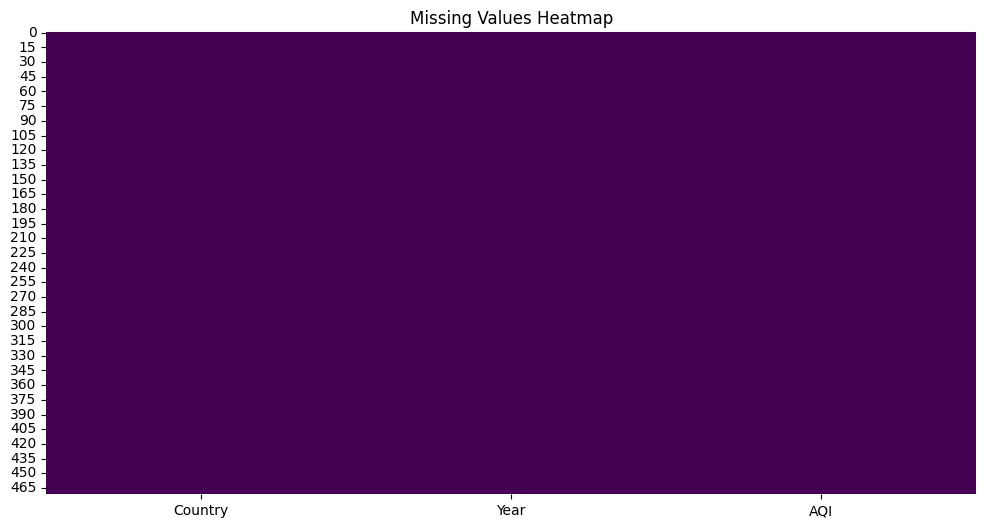

In [195]:
plt.figure(figsize=(12, 6))
sns.heatmap(grouped.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


I have filled the missing value of the AQI mean of the country
Each country has unique environmental, industrial, and policy factors affecting its AQI (Air Quality Index). Using the mean of the same country's available AQI values maintains this national profile, rather than distorting it with external or global averages.

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [203]:
client = MongoClient("mongodb://localhost:27017/")
db = client["air_pm2_5"] 
collection = db["pollution_summary"]
# Convert DataFrame to dictionary format and insert
grouped.to_csv(r"C:\Users\asus\Desktop\U22.zip",index=False)
collection.insert_many(grouped.reset_index().to_dict("records"))

InsertManyResult([ObjectId('682e4ea97310e42d2f4b1229'), ObjectId('682e4ea97310e42d2f4b122a'), ObjectId('682e4ea97310e42d2f4b122b'), ObjectId('682e4ea97310e42d2f4b122c'), ObjectId('682e4ea97310e42d2f4b122d'), ObjectId('682e4ea97310e42d2f4b122e'), ObjectId('682e4ea97310e42d2f4b122f'), ObjectId('682e4ea97310e42d2f4b1230'), ObjectId('682e4ea97310e42d2f4b1231'), ObjectId('682e4ea97310e42d2f4b1232'), ObjectId('682e4ea97310e42d2f4b1233'), ObjectId('682e4ea97310e42d2f4b1234'), ObjectId('682e4ea97310e42d2f4b1235'), ObjectId('682e4ea97310e42d2f4b1236'), ObjectId('682e4ea97310e42d2f4b1237'), ObjectId('682e4ea97310e42d2f4b1238'), ObjectId('682e4ea97310e42d2f4b1239'), ObjectId('682e4ea97310e42d2f4b123a'), ObjectId('682e4ea97310e42d2f4b123b'), ObjectId('682e4ea97310e42d2f4b123c'), ObjectId('682e4ea97310e42d2f4b123d'), ObjectId('682e4ea97310e42d2f4b123e'), ObjectId('682e4ea97310e42d2f4b123f'), ObjectId('682e4ea97310e42d2f4b1240'), ObjectId('682e4ea97310e42d2f4b1241'), ObjectId('682e4ea97310e42d2f4b12

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* FILL IN from answer to Step 1

#### 1.what are the top 5 most poluted countries

In [197]:
# Pivot the data to get years as columns
country_pollution = grouped.pivot(index='Country', columns='Year', values='AQI')

# Calculate average AQI across all years
country_pollution['averageAQI'] = country_pollution.mean(axis=1)

# Get top 5 most polluted countries based on average AQI
top5_countries = country_pollution.sort_values(by='averageAQI', ascending=False).head(5)

print(top5_countries)


Year              2018       2019       2020       2021  averageAQI
Country                                                            
Bangladesh   97.100000  83.300000  77.100000  52.056897   77.389224
Pakistan     74.300000  65.800000  59.000000  72.367290   67.866822
India        72.500000  58.100000  51.900000  52.567426   58.766857
Chad         53.922727  53.922727  53.922727  53.922727   53.922727
Afghanistan  61.800000  58.800000  46.500000  40.869231   51.992308


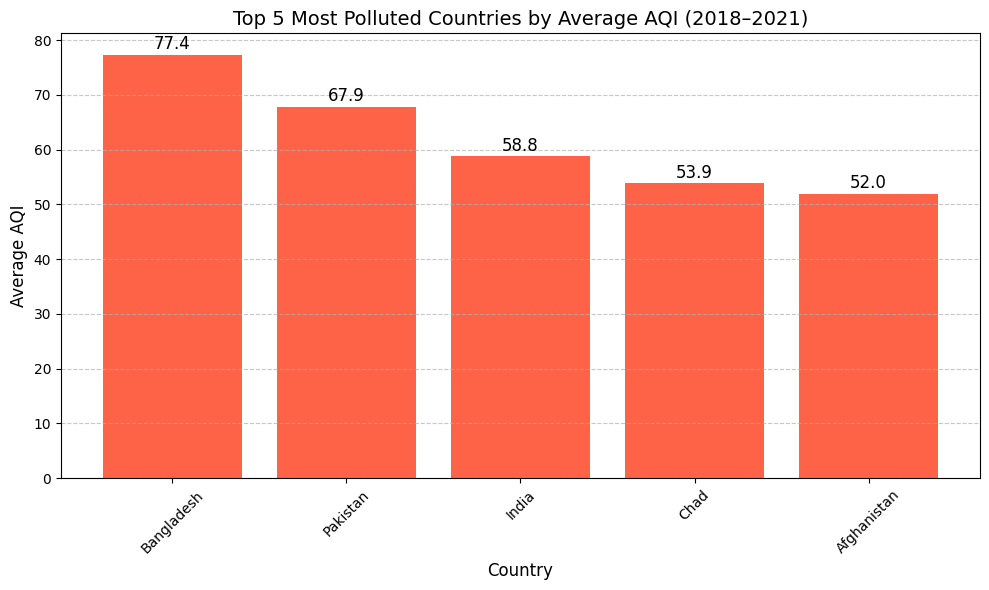

In [198]:

plt.figure(figsize=(10, 6))

# Use the correct column name: 'averageAQI'
bars = plt.bar(top5_countries.index, top5_countries['averageAQI'], color='tomato')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}', ha='center', fontsize=12)

plt.title('Top 5 Most Polluted Countries by Average AQI (2018–2021)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The top 5 most polluted countries in the period(2018-2021):
1.Bangladesh   
2.Pakistan     
3.India       
4.Chad      
5.Afghanistan

#### 2.Was there a significant drop in pollution levels during 2020 (possibly due to COVID-19 lockdowns)?


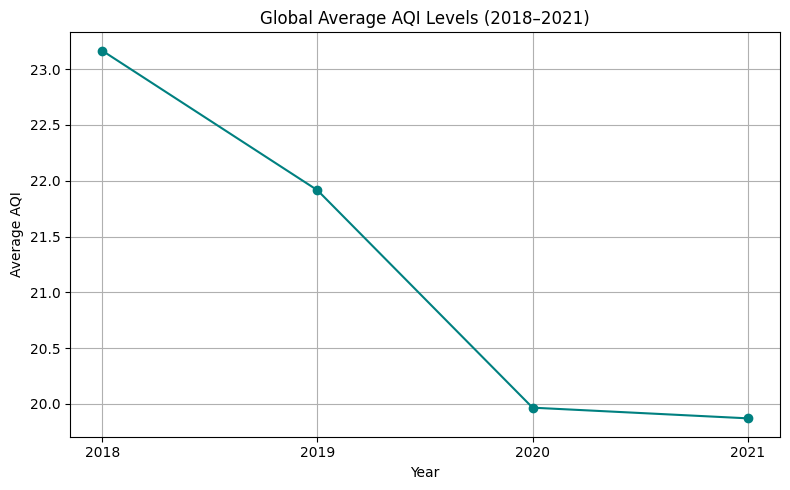

In [199]:
# Compute the global average AQI per year
yearly_avg = grouped.groupby('Year')['AQI'].mean()

plt.figure(figsize=(8, 5))
plt.plot(yearly_avg.index.astype(str), yearly_avg.values, marker='o', linestyle='-', color='teal')
plt.title("Global Average AQI Levels (2018–2021)")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.grid(True)
plt.tight_layout()
plt.show()


there was a huge drop in AQI during the global lockdown

#### 3.Which country showed the most improvement or deterioration in air quality over the 4 years?



Index(['2018', '2019', '2020', '2021'], dtype='object', name='Year')


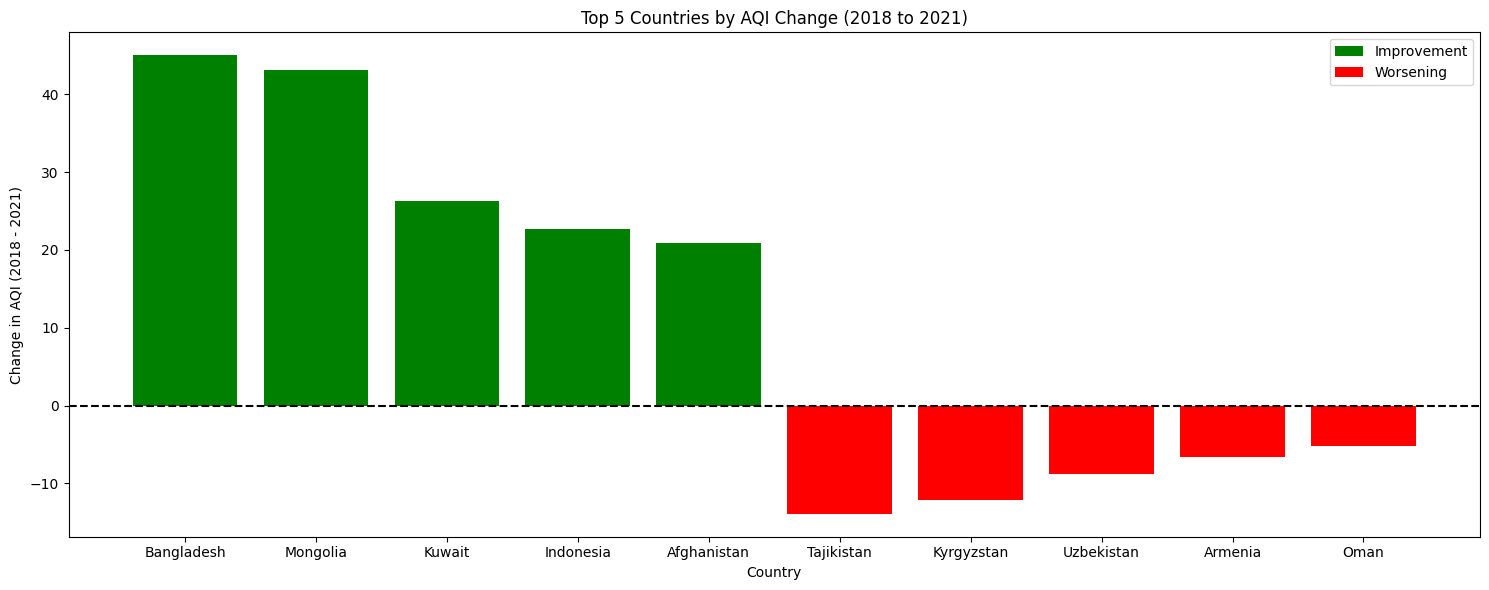

In [200]:
wide_data = grouped.pivot(index='Country', columns='Year', values='AQI')

print(wide_data.columns)  # Check if columns are strings or ints

# Use string column names if that's what your data has:
wide_data['change_2018_2021'] = wide_data['2018'] - wide_data['2021']

wide_data = wide_data.dropna(subset=['2018', '2021'])

top_improvers = wide_data['change_2018_2021'].sort_values(ascending=False).head(5)
top_decliners = wide_data['change_2018_2021'].sort_values(ascending=True).head(5)

plt.figure(figsize=(15,6))
plt.bar(top_improvers.index, top_improvers.values, color='green', label='Improvement')
plt.bar(top_decliners.index, top_decliners.values, color='red', label='Worsening')
plt.axhline(0, color='black', linestyle='--')
plt.title('Top 5 Countries by AQI Change (2018 to 2021)')
plt.ylabel('Change in AQI (2018 - 2021)')
plt.xlabel('Country')
plt.legend()
plt.tight_layout()
plt.show()


#### the country that showed the most improvement and the one that showed the most deterioration in air quality over the 4 years respectfully
-Bangladesh and Tajikistan


### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

#### During the data wrangling process, I focused on cleaning and merging datasets to analyze PM2.5 trends across countries. With more time or resources, I would explore additional data sources extending to the current year to examine long-term trends, especially whether the temporary pollution drop during the 2020 COVID-19 lockdown had lasting effects. I would also investigate structural data issues such as inconsistencies in country naming and missing values, and consider incorporating population or industrial data to better understand the drivers of pollution. These enhancements could lead to more accurate insights and uncover deeper relationships between policy, behavior, and air quality.